### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing dataset

In [2]:
df=pd.read_csv('data.csv')
df.head()

,crim,zin,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### Plotting correlation heatmap

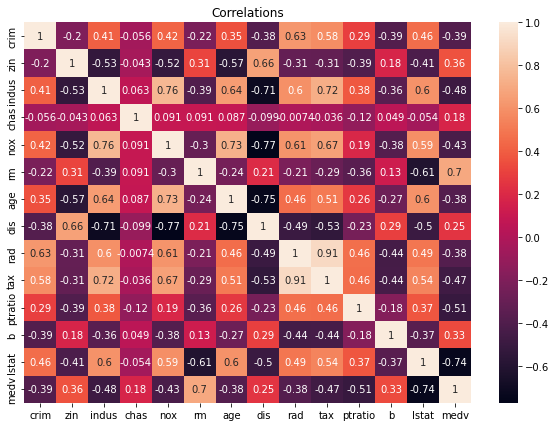

In [3]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)
plt.title('Correlations')
plt.show()

In [4]:
df.shape

(506, 14)

### Feature engineering

In [5]:
def remove_outliers(df,x):
    #set limits
    q25,q75=np.percentile(df[x],25),np.percentile(df[x],75)
    iqr=q75-q25
    cut_off=iqr*1.5
    lower,upper=1,(q75+cut_off)
    df=df[(df[x]<upper)&(df[x]>lower)]
    print('outliers of "{}" are removed\n'.format(x))
    return df

<AxesSubplot:xlabel='crim'>

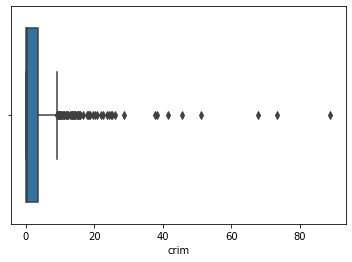

In [6]:
sns.boxplot(x=df['crim'])

In [7]:
df=remove_outliers(df,'crim')

outliers of "crim" are removed



<AxesSubplot:xlabel='rm'>

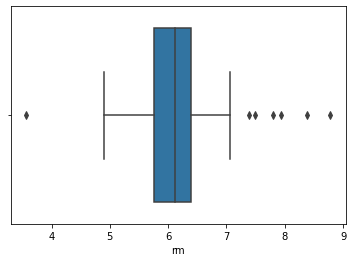

In [8]:
sns.boxplot(x=df['rm'])

<AxesSubplot:xlabel='age'>

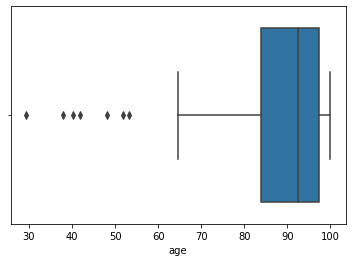

In [9]:
sns.boxplot(x=df['age'])

<AxesSubplot:xlabel='dis'>

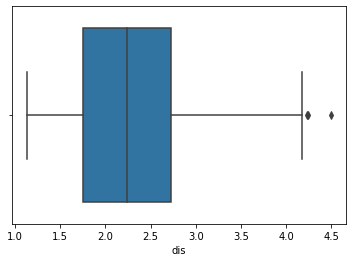

In [10]:
sns.boxplot(x=df['dis'])

<AxesSubplot:xlabel='rad'>

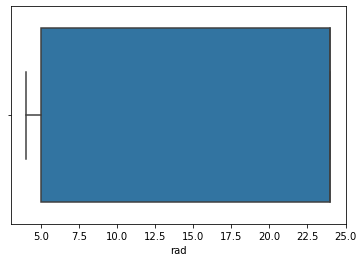

In [11]:
sns.boxplot(x=df['rad'])

<AxesSubplot:xlabel='tax'>

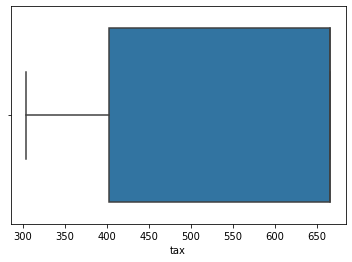

In [12]:
sns.boxplot(x=df['tax'])

<AxesSubplot:xlabel='ptratio'>

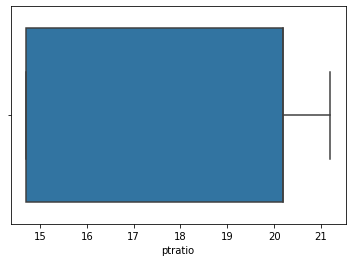

In [13]:
sns.boxplot(x=df['ptratio'])

outliers of "b" are removed



<AxesSubplot:xlabel='b'>

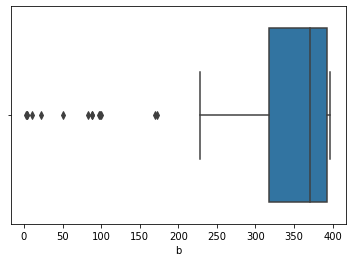

In [14]:
df=remove_outliers(df,'b')
sns.boxplot(x=df['b'])

<AxesSubplot:xlabel='lstat'>

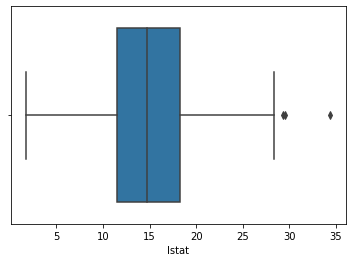

In [15]:
sns.boxplot(x=df['lstat'])

In [16]:
X=df.drop('medv',axis=1)
y=df.medv

### Performing train-test split

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

### Feature scaling

In [18]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)


### Fitting regression

In [19]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
r=RandomForestRegressor()
r.fit(X_train,y_train)
y_hat=r.predict(X_test)

### Calculating accuracy

In [20]:
mean_squared_error(y_hat,y_test)

5.227762181818198

In [21]:
r.score(X_train,y_train)  #training accuracy

0.9768865180904146

In [22]:
r.score(X_train,y_train)  #testing accuracy

0.9768865180904146

In [23]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_hat,y_test)

1.7383636363636383